In [1]:
import os
import time
import numpy as np
import pandas as pd
#pd.set_option("display.max_colwidth", 100)
#pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
import seaborn as sns

# NOTE : complete duration of all cells composing this notebook except googletranslate is 1h25

#data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv',index_col=0)
#target = data_train['prdtypecode']

# !!!! important note !!!! : 
#this notebook handles preprocessing of raw input file : X_train_rakuten_update_with_translated_designation.csv
#
#main development was made using previous version X_train_rakuten_update_with_lang_ind.csv
#with around 18000 designation texts in foreign language
#
# for history X_train_rakuten_update.csv was the original file downloaded from Rakuten challenge site :
# columns imageid and productid has been merged into nom_img and then deleted
# columns description merged into designation and then deleted
# column lang_designation gives language information
# column designation is the answer of googletranslate of foreign language into french one when necessary
# original designation (both french and foreign languages) has be renamed designation_orig
#
#data_train = pd.read_csv('X_train_rakuten_update.csv',index_col=0)
#data_train = pd.read_csv('X_train_rakuten_update_with_lang_ind.csv',index_col=0)
data_train = pd.read_csv('X_train_rakuten_update_with_translated_designation.csv',index_col=0)
data_test = pd.read_csv('X_test_rakuten_update.csv',index_col=0)
target = pd.read_csv('Y_train_rakuten_CVw08PX.csv',index_col=0)
#data_full = pd.concat([data_train, target], axis = 1)
print("shape of training set of Rakuten products       :",data_train.shape)
print("shape of labels vector related to train set     :",target.shape)
print("shape of test set of Rakuten products           :",data_test.shape,"\n")

# Find the duplicate rows if any based on all columns
print("check on rows duplicate presence :")
duplicate_train = data_train[data_train.duplicated()]
print(duplicate_train)

print("\ndataset info :")
print(data_train.info())
print("\ndataset first rows :\n")
display(data_train.head(10))
print("\nfirst classes in target vector :\n")
display(target.head(10))


shape of training set of Rakuten products       : (84916, 4)
shape of labels vector related to train set     : (84916, 1)
shape of test set of Rakuten products           : (13812, 4) 

check on rows duplicate presence :
Empty DataFrame
Columns: [designation_orig, nom_img, lang_designation, designation]
Index: []

dataset info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   designation_orig  84916 non-null  object
 1   nom_img           84916 non-null  object
 2   lang_designation  84916 non-null  object
 3   designation       84916 non-null  object
dtypes: object(4)
memory usage: 3.2+ MB
None

dataset first rows :



designation_orig  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4  La Guerre Des Tuques Luc a des idées de grande...   
5  Afrique Contemporaine N° 212 Hiver 2004 - Doss...   
6        Christof E: Bildungsprozessen Auf Der Spur    
7  Conquérant Sept Cahier Couverture Polypro 240 ...   
8         Puzzle Scooby-Doo Avec Poster 2x35 Pieces    
9  Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...   

                                   nom_img lang_designation  \
0  image_1263597046_product_3804725264.jpg               de   
1   image_1008141237_product_436067568.jpg               fr   
2    image_938777978_product_201115110.jpg               fr   
3     image_457047496_product_50418756.jpg               fr   
4   image_1077757786_product_278535884.jpg               fr   
5      image_393356830_product_5862738.jpg               fr   
6     image_907794536_product_91920807.jpg               de   
7    image_999581347_product_344240059.jpg               fr   
8  image_1325918866_product_4239126071.jpg               en   
9  image_1245644185_product_3793572222.jpg               fr   

                                         designation  
0  Olivia: Notebook personnalisé / 150 pages / Pu...  
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...  
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...  
3  Peluche Donald - Europe - Disneyland 2000 (Mar...  
4  La Guerre Des Tuques Luc a des idées de grande...  
5  Afrique Contemporaine N° 212 Hiver 2004 - Doss...  
6     Christof E: processus éducatifs sur le sentier  
7  Conquérant Sept Cahier Couverture Polypro 240 ...  
8          Puzzle Scooby-doo AVEC Poster 2x35 pièces  
9  Tente Pliante V3s5-Pro Pvc Blanc - 3 X 4m50 - ...


first classes in target vector :



prdtypecode
0           10
1         2280
2           50
3         1280
4         2705
5         2280
6           10
7         2522
8         1280
9         2582

In [2]:
# done in a separate npotebook
#language translation of product designation text
#from googletrans import Translator
#translator = Translator(service_urls=['translate.google.com'])

number of classes : 27 

list of product type codes (classes) :
 [  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301] 



prdtypecode  products Nbr  relative % of dataset
0          2583         10209                   12.0
2          1300          5045                    6.0
3          2060          4993                    6.0
4          2522          4989                    6.0
5          1280          4870                    6.0
6          2403          4774                    6.0
7          2280          4760                    6.0
1          1560          5073                    6.0
8          1920          4303                    5.0
9          1160          3953                    5.0
10         1320          3241                    4.0
11           10          3116                    4.0
15           40          2508                    3.0
17         1302          2491                    3.0
16         2585          2496                    3.0
13         1140          2671                    3.0
14         2582          2589                    3.0
12         2705          2761                    3.0
18         1281          2070                    2.0
19           50          1681                    2.0
20         2462          1421                    2.0
21         2905           872                    1.0
22           60           832                    1.0
23         2220           824                    1.0
24         1301           807                    1.0
25         1940           803                    1.0
26         1180           764                    1.0


Top10 product type codes represents 64.0 % of dataset


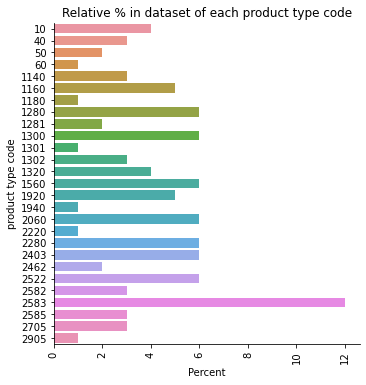

In [3]:
print("number of classes :",len(target['prdtypecode'].unique()),"\n")
print("list of product type codes (classes) :\n",target['prdtypecode'].unique(),"\n")
#print("number of products for each product type code :\n",target['prdtypecode'].value_counts())
#print("\nRelative % in dataset of each product type code :\n",np.round(target['prdtypecode'].value_counts(normalize=True)*100),2)

prdtypecode_count = target['prdtypecode'].value_counts()
dataviz_codel = pd.DataFrame(prdtypecode_count)
dataviz_codel = dataviz_codel.reset_index()
dataviz_codel = dataviz_codel.rename(columns={"prdtypecode": "products Nbr"})

prdtypecode_pct = target['prdtypecode'].value_counts(normalize=True)*100
dataviz_coder = pd.DataFrame(prdtypecode_pct)
dataviz_coder = dataviz_coder.reset_index()


dataviz_code = pd.merge(dataviz_codel, dataviz_coder, on="index")
dataviz_code = dataviz_code.rename(columns={"index": "prdtypecode", "prdtypecode": "relative % of dataset"})
dataviz_code['relative % of dataset'] = np.round(dataviz_code['relative % of dataset'])
dataviz_code = dataviz_code.sort_values('relative % of dataset',ascending=False)
display(dataviz_code.head(len(dataviz_code)))
sns.catplot(x="relative % of dataset",y="prdtypecode",orient="h",kind="bar",data=dataviz_code)
plt.xlabel("Percent")
plt.ylabel("product type code") 
plt.title("Relative % in dataset of each product type code")
plt.xticks(rotation=90);

sum_top10 = round(dataviz_code['relative % of dataset'].head(10).sum())
print("\nTop10 product type codes represents {0} % of dataset".format(sum_top10))
# products distributed over 27 classes (product type code)
# dataset imbalanced with class 2583 being oversampled (12%)
# and 6 classes undersampled (1%) and other 3 at 2%

In [5]:
# !!!!! cell no more valid as working ONLY on original dataset rain_rakuten_update.csv !!!!!
# !!!!! as description field has been merged into designation to optimize foreign language recognition !!!!!
#Display number and percentage of missing values in dataframe
#df_nul = pd.DataFrame({'Nbr of NaN': data_train.isnull().sum(), 'Percentage': round(100*data_train.isnull().sum()/len(data_train))})

#Display columns with missing values and importance in % for decision-making aid
#print("\nFirst check of NaN present in raw dataset :")
#display(df_nul[df_nul['Nbr of NaN'] > 0] )
# the description field is not filled for 29800 products

#Display NaN rate per class 
#df1 = data_train.join(target)
#df1 = df1.drop(['designation','productid','imageid'], axis=1)
#df1 = df1.drop(['designation','nom_img'], axis=1)
#list_class = []
#list_nbr_nan =[]
#list_nbr_class = []
#list_percent_nan = []
#i=0
#for element in target['prdtypecode'].unique():
#    list_class.append(element)
#    list_nbr_nan.append(df1[df1['prdtypecode'] == element]['description'].isnull().sum())
#    list_nbr_class.append(df1[df1['prdtypecode'] == element]['prdtypecode'].value_counts().iloc[0])
#    list_percent_nan.append(round(( list_nbr_nan[i] / list_nbr_class[i])*100))
#    i += 1
    
#df2 = pd.DataFrame({'Class': list_class, 'Nbr of NaN': list_nbr_nan, 'Nbr of products': list_nbr_class, '% NaN': list_percent_nan})
   
#df2 = df2.sort_values('% NaN',ascending=False)   
#display(df2.head(len(df2)))

# Not really possible to apply dropna (too many lost items except for few classes for which it could be considered) 
# decision : both text columns will be merged
    

In [4]:
#!!!! already done in input read_csv X_train_rakuten_update_with_lang_ind.csv !!!!
#from bs4 import BeautifulSoup
#import re
#start = time.time()
# execution time around 6 minutes
# add column with name of associated product image

#data_train['nom_img'] = "image_" + data_train.imageid.astype(str) + "_product_" + data_train.productid.astype(str) + ".jpg"
#data_train = data_train.drop(['productid','imageid'],axis=1)
# to prepare clean merge between both text columns
#data_train = data_train.fillna("")
# save original description text before merge
#data_train['designation_orig'] = data_train['designation']

#clean of html tags

#The BeautifulSoup object has a text attribute that returns the plain text of a HTML string sans the tags.
#soup = BeautifulSoup("""<h1>Hello</h1><p>World</p>""", 'lxml')
#soup.text
# 'HelloWorld'

#for i in range(len(data_train)):
    #PB : BeautifulSoup .text method returns text without separators
#    data_train['description'].iloc[i]  = BeautifulSoup(data_train['description'].iloc[i], "lxml").text
#    data_train['description'].iloc[i]  = BeautifulSoup(data_train['description'].iloc[i], "lxml").get_text(separator=' ')
    #to remove multiple spaces.
#    data_train['description'].iloc[i] = re.sub(r"  +", " ",data_train['description'].iloc[i])

# merge description into designation text variable : tokens generation will be on this largest words base 
#data_train['designation'] = data_train['designation'] + " " + data_train['description']
#data_train = data_train.drop(['description'], axis = 1)

#end = time.time()
#elapsed = round((end - start)/60)

#print(f'\ncell execution duration : {elapsed:.2f} mn')


C:\Users\christophe\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\christophe\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://placehold.it/100x70" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\christophe\anaconda3\lib\site-packages\bs4\__init__.py:417: MarkupResemblesLocatorWarning: "https://www.pro-bems.com/IMAGES/images_1/FIGJJCT0000117/m/FIGJJCT0000117_5.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
C:\Users\christophe\anaconda3\lib\site-pack


cell execution duration : 6.00 mn


In [5]:
# !!!!! cell run ONCE in order to add column lang_designation and save into new X_train_rakuten_update_with_lang_ind.csv
# note : 'ca' canadian was in fact french after double check so set finally as 'fr' 
#from langdetect import detect

#data_train = pd.read_csv('X_train_rakuten_update.csv',index_col=0)
#data_train['lang_designation'] = ''

#start = time.time()

#for i in range(len(data_train)):
#    if ((i == 10000) | (i == 20000) | (i == 30000) | (i == 40000) | (i == 50000) | (i == 60000) | (i == 70000)):
#        print("in progress : {0} rows over {1} done ".format(i,len(data_train)))
#    data_train['lang_designation'].iloc[i] = detect(data_train['designation'].iloc[i])
    
#print(data_train['lang_designation'].value_counts())
#end = time.time()
#elapsed = round((end - start)/60)

#print(f'\ncell execution duration : {elapsed:.2f} mn')
#data_train.to_csv(r'X_train_rakuten_update_with_lang_ind.csv',index=True)

in progress : 10000 rows over 84916 done 
in progress : 20000 rows over 84916 done 
in progress : 30000 rows over 84916 done 
in progress : 40000 rows over 84916 done 
in progress : 50000 rows over 84916 done 
in progress : 60000 rows over 84916 done 
in progress : 70000 rows over 84916 done 
fr    65123
en    12389
de     2783
nl     1061
ca      764
it      630
ro      338
es      317
pt      292
id      190
no      160
af      120
tl      114
da       89
et       79
sv       63
sw       61
so       45
sl       45
hr       42
cy       38
pl       35
fi       34
vi       33
tr       25
lt       11
hu       10
sq        7
sk        7
lv        6
cs        5
Name: lang_designation, dtype: int64

cell execution duration : 23.00 mn


In [4]:
#preprocessing Natural Language ToolKit module
# Note : execution time around 5 minutes
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.regexp import RegexpTokenizer
import re

start = time.time()

#text variable designation has no missing data 
#so NLP text preprocessing steps executed on it

# set in lowercase as stopwords to apply in next step are expressed in lowercase
data_train['designation'] = data_train['designation'].map(lambda x: x.lower())

#remove numbers
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'[0-9]+', '', x))

#remove french accent
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'é', 'e', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'è', 'e', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'î', 'i', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'â', 'a', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'ô', 'o', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'ë', 'e', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'ê', 'e', x))

##replace hyphens with spaces
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'-', ' ', x))

#convert plural to singular (stemming rather ?)
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'livres', 'livre', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'tomes', 'tome', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'jouets', 'jouet', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'jeux', 'jeu', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'carnets', 'carnet', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'manettes', 'manette', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'enfants', 'enfant', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'classiques', 'classique', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'chiens', 'chien', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'arts', 'art', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"d'art", 'art', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"l'art", 'art', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'figurines', 'figurine', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'cartes', 'carte', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'filles', 'fille', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'bebes', 'bebe', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'bonbons', 'bonbon', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'nouvelles', 'nouvelle', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'editions', 'edition', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"d'edition", 'edition', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"l'arriere", 'arriere', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'appats', 'appat', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'sacs', 'sac', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'revues', 'revue', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'magazines', 'magazine', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'francaise', 'francais', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"l'eau", 'eau', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"d'eau", 'eau', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'volumes', 'volume', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"\bvol\b", 'volume', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"d'oreiller", 'oreiller', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"d'appareils", 'appareils', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"l'ecran", 'ecran', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"l'histoire", 'histoire', x))
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r"caritatives.", 'caritatives', x))


#various
data_train['designation'] = data_train['designation'].map(lambda x: re.sub(r'heroclix-', 'heroclix', x))

#tokenisation operation transforms text into serie of individual tokens.
data_train['designation_token'] = data_train.apply(lambda row: word_tokenize(row['designation']), axis=1)


# first french dictionnary updated only with some special characters
# to compose this list , we suppress all a-z characters and check the remaining ones
fr_stopwords = set(stopwords.words('french'))
fr_stopwords.update([":", "/", "//", "(", ")" , "N°", "n°", "%", "?", "+",".","&","[","]","*","''","``","'","////","br/"])
fr_stopwords.update(["°", "@","xcm" ,"-cm","kg/m","g/m","m³/h","m²","gr/m²","_", "#", ";", "ø" ,"--" , "²" , "_-","s'en","s'il", "n'est","d'un","d'une","...","g/m²","m/h","c'est","qu'il","qu'elle","jusqu"])

list_stopwords_colours = ["rose","gris","blanc","noir","vert","bleu","rouge","marron","black","anthracite","jaune"]
list_stopwords_adjectives = ["bon","nouveau","facile","rare","commune","grand","petit","mini","deux","ronde","bas","chaud","pliable","neuf","ovale"]
list_stopwords_adjectivesbis = ["doux","confortable","new","nouvelle","nouveaux","grande","complet","integrale","legere"]
list_stopwords_adverb = ["chaque","plus","contre","dont","sans","pieces","pcs","piece","comment","sous","chez","entre","tous","depuis","aussi","alors"]
list_stopwords_adverbis = ["tout","toutes","comme","ainsi","assez","jamais","encore","lorsque","tres","toujours","apres","quand","grace"]
list_stopwords_adverbter = ["neanmoins","meme","avant","environ","peu","propos","legerement","aujourd'hui","trop","souvent"]
list_stopwords_various_names = ["longueur","largeur","necessaire","facilement","non","peut","ans","mois","attention"]
list_stopwords_various_namesbis = ["description","comprend","qualite","haute","merci","ci-dessus","caracteristiques","couleur","couleurs"]
list_stopwords_various_namester = ["annee","annees","taille","inclus","dimensions","poids","difference","different"]
list_stopwords_verbs = ["etre","avoir","donnons","vendons","reversons","peuvent","pouvez","gardez","permettre","n'existe","utiliser","utilise","fait","plait","parlait"]
list_stopwords_pronouns = ["cette","cet","leurs","ceux","toute"]

fr_stopwords.update(list_stopwords_colours)
fr_stopwords.update(list_stopwords_adjectives)
fr_stopwords.update(list_stopwords_adjectivesbis)
fr_stopwords.update(list_stopwords_adverb)
fr_stopwords.update(list_stopwords_adverbis)
fr_stopwords.update(list_stopwords_adverbter)
fr_stopwords.update(list_stopwords_various_names)
fr_stopwords.update(list_stopwords_various_namesbis)
fr_stopwords.update(list_stopwords_various_namester)
fr_stopwords.update(list_stopwords_verbs)
fr_stopwords.update(list_stopwords_pronouns)

#print(fr_stopwords)
# no more useful as designation text translated 
#eng_stopwords = set(stopwords.words('english'))
#ger_stopwords = set(stopwords.words('german'))

def stop_words_filtering_fr(mots): 
    tokens = [mot for mot in mots if mot not in fr_stopwords]
    return tokens   


#empty words (words used as tool by language) are no more present in the corpus 
data_train['designation_token_stopwords_done'] = data_train.apply(lambda row: stop_words_filtering_fr(row['designation_token']), axis=1)
data_train = data_train.drop(['designation_token'],axis=1)


#suppress tokens less than 3 characters
for i in range(len(data_train['designation_token_stopwords_done'])):
    words_before  = data_train['designation_token_stopwords_done'].iloc[i]
    words_after = []
    for j in range(len(words_before)):
        if (len(words_before[j]) >=3):
            words_after.append(words_before[j])
    data_train['designation_token_stopwords_done'].iloc[i] = words_after
        

#display(data_train['designation_token_stopwords_done'].head(50))
#print("\n")
#display(data_train['designation_token_stopwords_done'].tail(50))
print("new column created in dataset named designation_token_stopwords_done")
print("containing tokens of text designation and with stopwords applied")

end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')

new column created in dataset named designation_token_stopwords_done
containing tokens of text designation and with stopwords applied

cell execution duration : 4.00 mn


In [17]:
# cell ONLY for short demo
#as unfortunately its job is to cut words (prefix and suffix) 
#and it becomes human less readable but probably more efficient for machine algorithm
#!!!! to many side effects so technique not used !!!!!
#Import stemming library :
#from nltk.stem import PorterStemmer

#porter = PorterStemmer()

#def stemming_designation_tokens(mots): 
#    tokens = []
#    for i in range(len(mots)):
#        tokens.append(porter.stem(mots[i]))
#    return tokens

#print(data_train['designation_token_stopwords_done'].iloc[1])
#toto = stemming_designation_tokens(data_train['designation_token_stopwords_done'].iloc[1])
#print("")
#print(toto)


['journal', 'art', 'art', 'marche', 'salon', 'art', 'asiatique', 'paris', 'jacques', 'barrere', 'francois', 'perrier', 'reforme', 'ventes', 'encheres', 'publiques', 'sna', 'fete', 'cent']

['journal', 'art', 'art', 'march', 'salon', 'art', 'asiatiqu', 'pari', 'jacqu', 'barrer', 'francoi', 'perrier', 'reform', 'vent', 'encher', 'publiqu', 'sna', 'fete', 'cent']


In [5]:
# cell lemmatization for french language
# Note : execution time around 28 minutes so progress indication every 10000 samples
import spacy
nlp = spacy.load('fr_core_news_md')


start = time.time()

# iterate on each product of dataset
for i in range(len(data_train['designation_token_stopwords_done'])):
    if ((i == 10000) | (i == 20000) | (i == 30000) | (i == 40000) | (i == 50000) | (i == 60000) | (i == 70000)):
        print("in progress : {0} rows over {1} done ".format(i,len(data_train)))
    str_tokens = ""
    str_tokens += " ".join(data_train['designation_token_stopwords_done'].iloc[i]) 

    tokenized_str = nlp(str_tokens)
    new_tokens_after_lemmatization = []
    for token in tokenized_str:
        new_tokens_after_lemmatization.append(token.lemma_)
    data_train['designation_token_stopwords_done'].iloc[i]  = new_tokens_after_lemmatization

#to clean side effect of spacy lemmatization
#suppress tokens less than 3 characters
for i in range(len(data_train['designation_token_stopwords_done'])):
    words_before  = data_train['designation_token_stopwords_done'].iloc[i]
    words_after = []
    for j in range(len(words_before)):
        if (len(words_before[j]) >=3):
            words_after.append(words_before[j])
    data_train['designation_token_stopwords_done'].iloc[i] = words_after
    
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')


in progress : 10000 rows over 84916 done 
in progress : 20000 rows over 84916 done 
in progress : 30000 rows over 84916 done 
in progress : 40000 rows over 84916 done 
in progress : 50000 rows over 84916 done 
in progress : 60000 rows over 84916 done 
in progress : 70000 rows over 84916 done 

cell execution duration : 28.00 mn


for class 10 : ['livre', 'edition', 'tome', 'histoire', 'vie', 'etat', 'prix', 'occasion', 'guide', 'organisation', 'partenaire', 'ammareal', 'caritatif', 'collection', 'franc', 'art', 'volume', 'bibliotheque', 'saint', 'pratique', 'français', 'auteur', 'association', 'enfant', 'siecle', 'faire', 'titre', 'editeur', 'homme', 'science', 'politique', 'etude', 'fournir', 'cours', 'voyage', 'part', 'ancien', 'lign', 'jour', 'droit', 'page', 'guerre', 'journal', 'recyclon', 'maison', 'pari', 'jean', 'reverse', 'net', 'monde'] 

for class 2280 : ['journal', 'franc', 'pari', 'revue', 'magazine', 'monde', 'francai', 'art', 'jean', 'vie', 'histoire', 'illustre', 'guerre', 'presse', 'politique', 'special', 'gravure', 'serie', 'saint', 'dossier', 'general', 'dessin', 'jour', 'france', 'hors', 'parisien', 'science', 'mode', 'sport', 'maison', 'texte', 'etat', 'femme', 'figaro', 'tele', 'photo', 'homme', 'paul', 'affaire', 'pierre', 'europe', 'equipe', 'tour', 'voyage', 'français', 'mort', 'film', 

for class 1160 : ['carte', 'pokemon', 'magic', 'mtg', 'dragon', 'ball', 'edition', 'monstre', 'panini', 'super', 'reverse', 'serie', 'adrenalyn', 'holo', 'force', 'foil', 'tour', 'star', 'eme', 'jeu', 'ere', 'effet', 'lune', 'inverse', 'lot', 'soleil', 'wars', 'cimetiere', 'ultra', 'adversair', 'niveau', 'tcg', 'set', 'premium', 'the', 'evolution', 'will', 'topps', 'combat', 'achat', 'foot', 'world', 'terrain', 'mint', 'carddass', 'francai', 'warcraft', 'euro', 'champion', 'niv'] 

for class 2060 : ['diamant', 'lumiere', 'decoration', 'led', 'peinture', 'noel', 'materiel', 'mural', 'bricolage', 'maison', 'image', 'decor', 'chambre', 'mur', 'lamper', 'resine', 'toile', 'salle', 'produire', 'surface', 'raison', 'correspondre', 'eau', 'autocollant', 'dessin', 'sticker', 'cadeau', 'type', 'bain', 'mettre', 'emballage', 'contenu', 'parfait', 'mesure', 'batterie', 'forfait', 'solaire', 'produit', 'besoin', 'manuel', 'bureau', 'materiau', 'paquet', 'faire', 'enfant', 'etc', 'mariage', 'mode',

<ipython-input-6-bbe6f00948d5>:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= (10,6))


for class 1302 : ['enfant', 'jouet', 'peche', 'stress', 'materiel', 'eau', 'lent', 'stream', 'super', 'led', 'appat', 'bracelet', 'cadeau', 'lamper', 'leurre', 'poisson', 'air', 'jeu', 'mignon', 'batterie', 'sac', 'pech', 'protection', 'main', 'exterieur', 'acier', 'sport', 'mode', 'securite', 'plein', 'faire', 'crochet', 'durable', 'trampoline', 'lumiere', 'plastique', 'ligne', 'camping', 'toy', 'aluminium', 'poche', 'long', 'emballage', '.cm', 'tente', 'paquet', 'hausse', 'montre', 'produire', 'anti'] 

for class 2220 : ['chien', 'animal', 'chat', 'pet', 'compagnie', 'vetement', 'collier', 'materiel', 'cou', 'jouet', 'mode', 'poitrin', 'nbsp', 'image', 'hiver', 'chiot', 'different', 'tour', 'aquarium', 'reglabl', 'dog', 'raison', 'mesure', 'eau', 'forfait', 'faire', 'pouce', 'contenu', 'main', 'petit', 'env', 'coton', 'durable', 'ete', 'element', 'respirant', 'specification', '.lb', 'taille', 'comprehension', 'cat', 'tissu', 'convier', 'puppy', 'securite', 'gilet', 'reel', 'materiau'

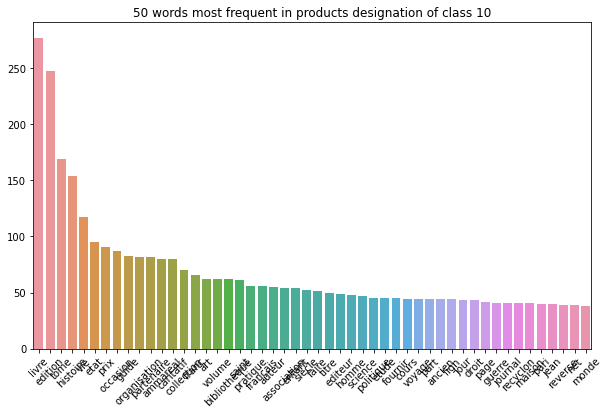

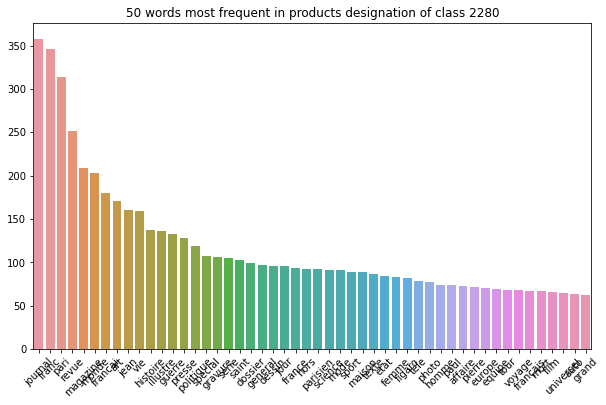

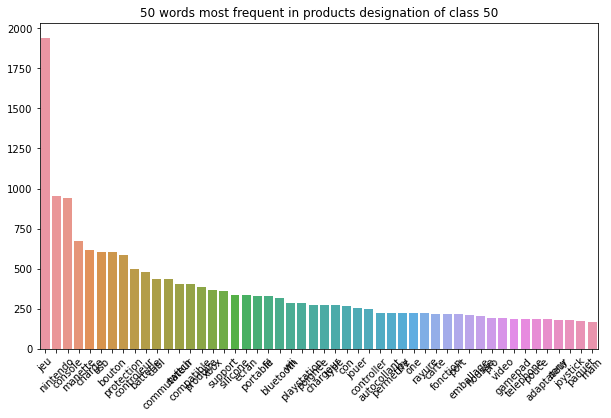

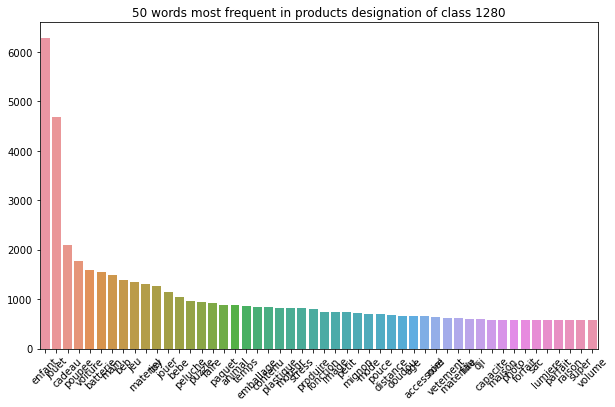

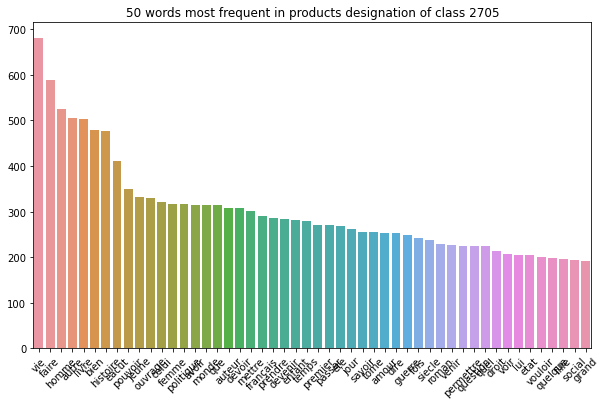

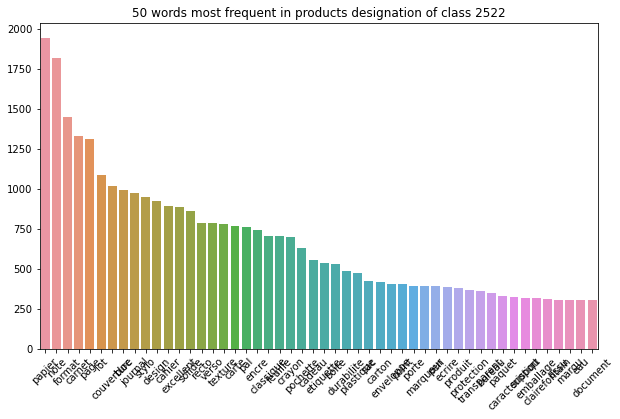

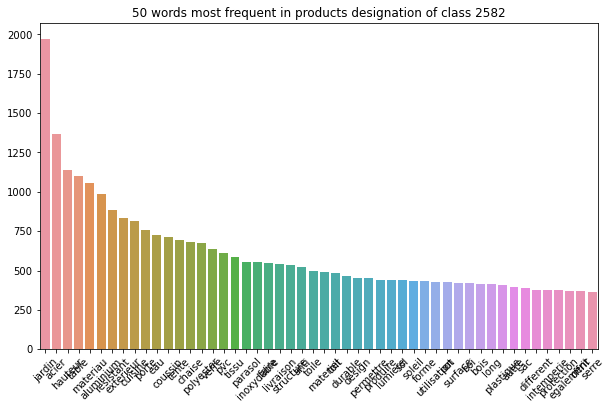

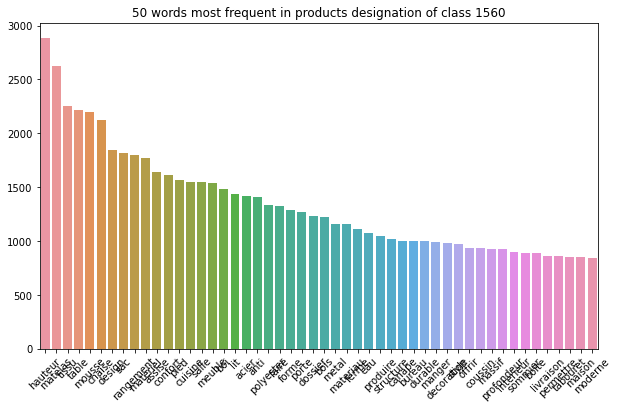

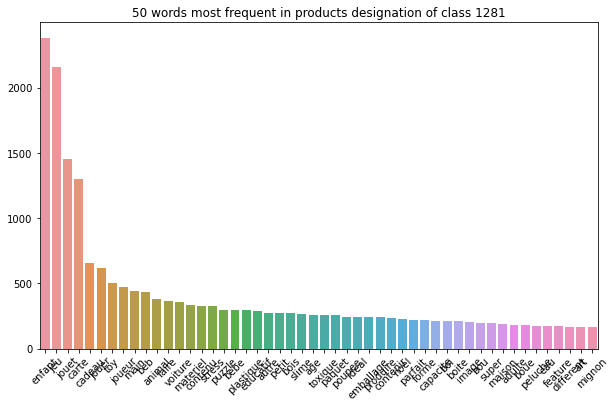

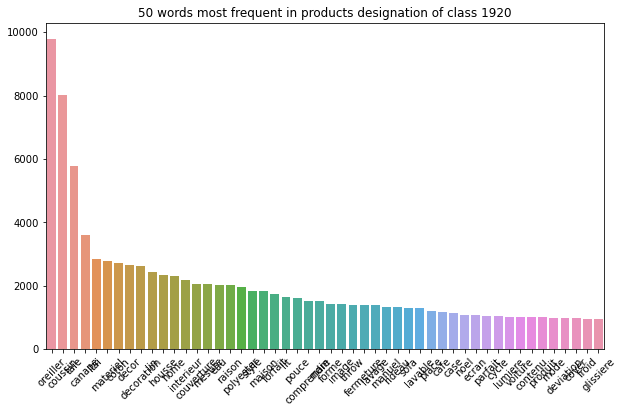

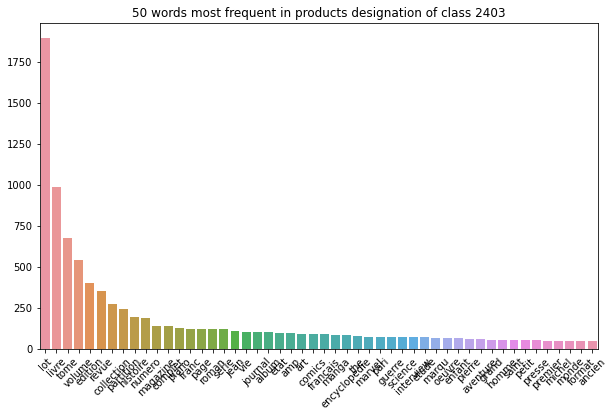

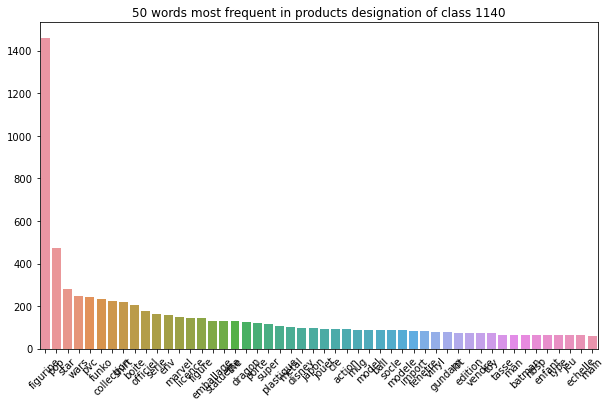

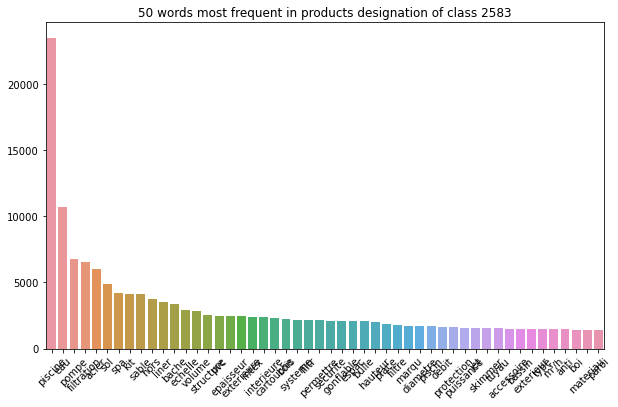

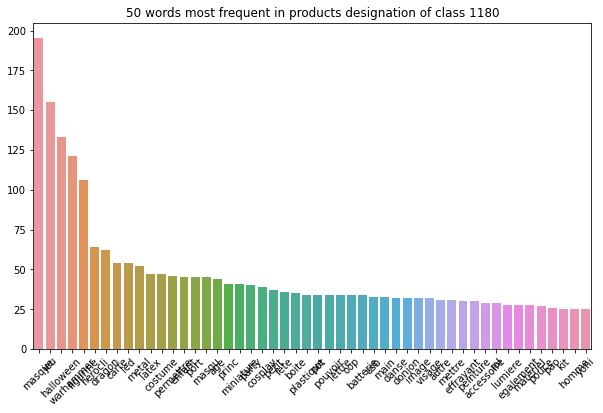

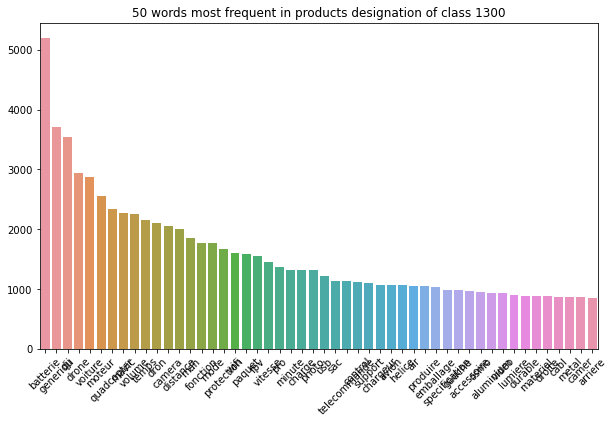

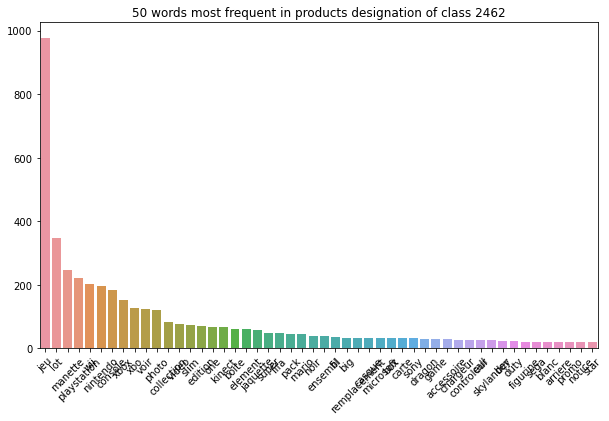

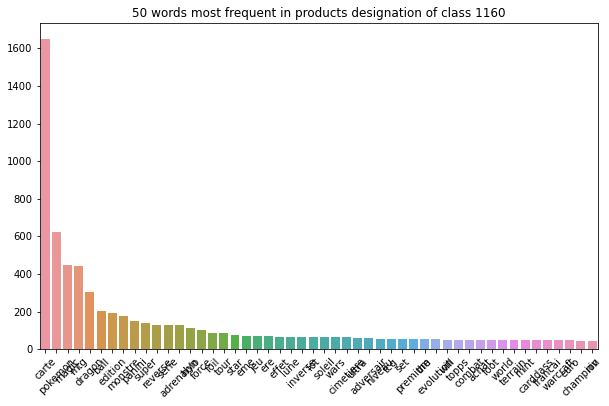

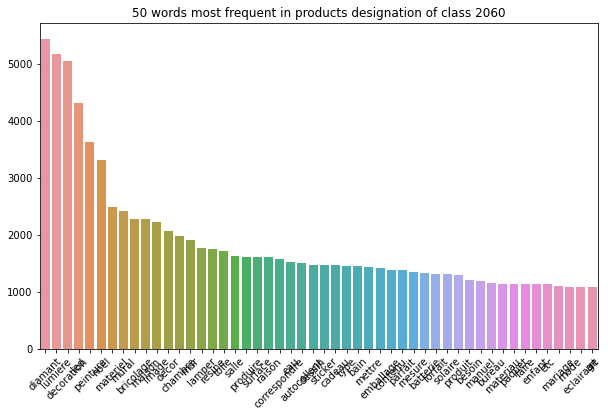

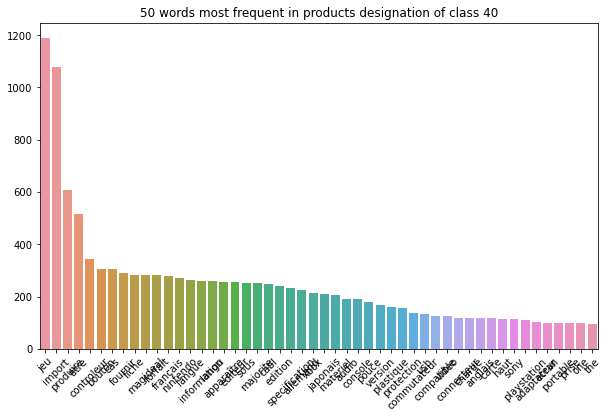

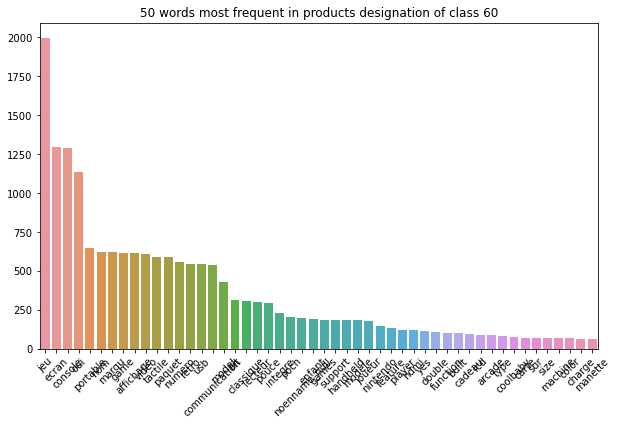

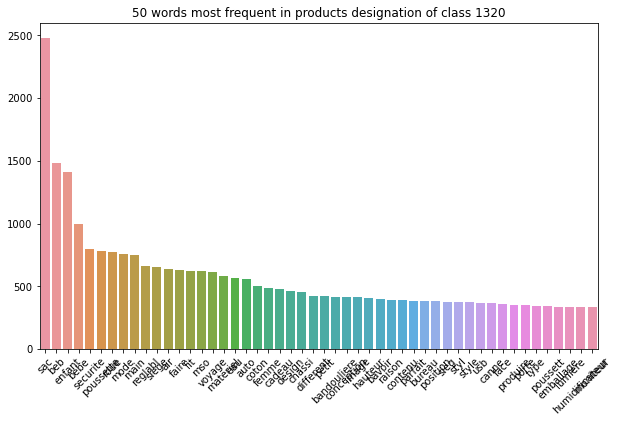

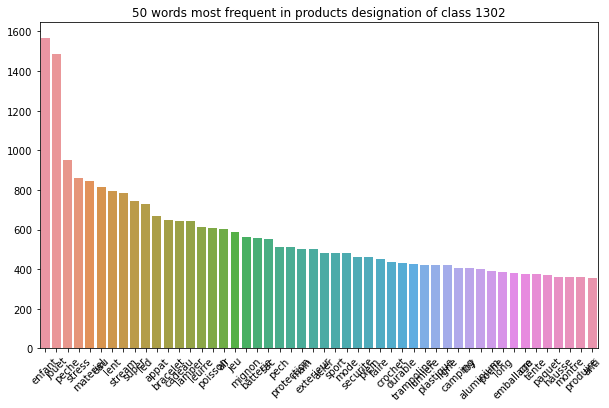

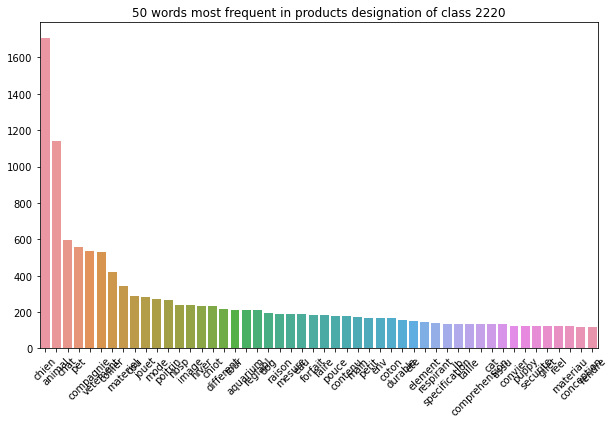

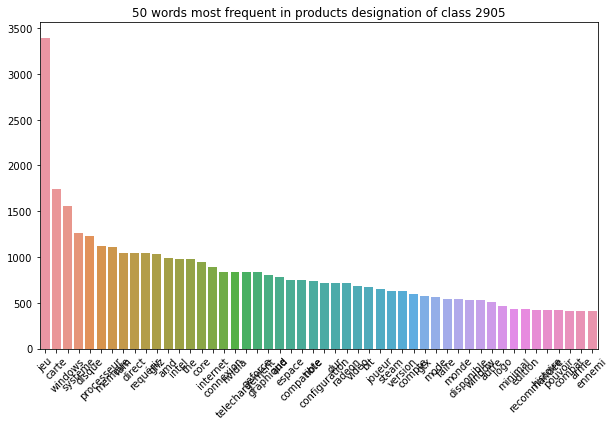

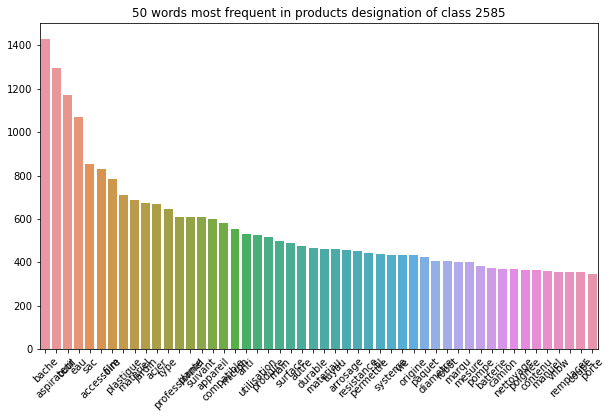

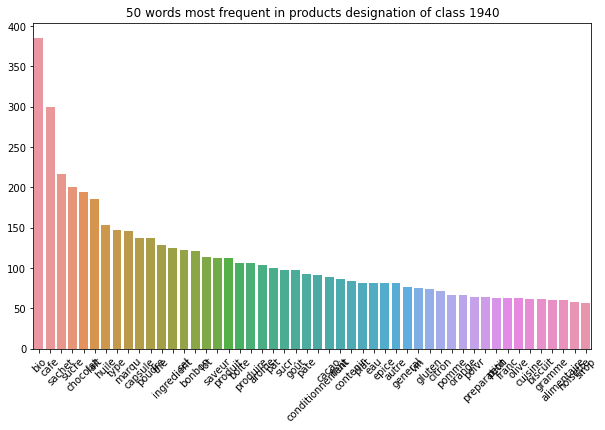

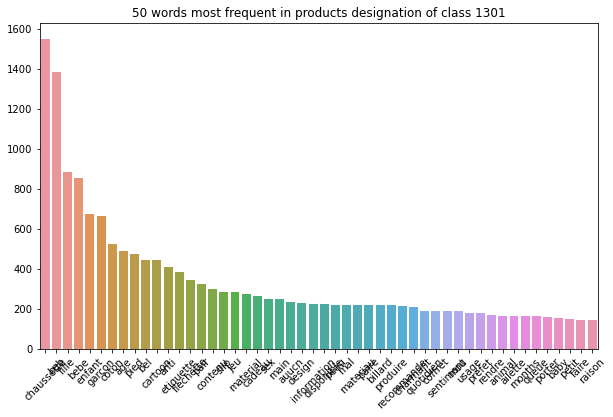

In [6]:
from collections import Counter
# for DataViz purpose
# Note : execution duration around 3 mn to display the 27 graphs 
df5 = data_train.drop(['nom_img'],axis=1)
df5 = df5.join(target)

start = time.time()

# size of most frequent words (TOP list)
size_top = 50

#list of lists , each stored list being the list of tokens per class and the other one their frequency
all_classes = []
all_mots = []
all_freq = []
# loop on product type code list
for k in target['prdtypecode'].unique():
    list_tokens_class = []
    # loop on products of this type code
    for i in range(len(df5[df5['prdtypecode'] == k])):
        list_tokens_one_product = df5[df5['prdtypecode'] == k]['designation_token_stopwords_done'].iloc[i]
        #loop on designation field tokens of each product 
        for j in range(len(list_tokens_one_product)):
            list_tokens_class.append(list_tokens_one_product[j])
            
    dico = Counter(list_tokens_class)

    mots = [m[0] for m in dico.most_common(size_top)]
    freq = [m[1] for m in dico.most_common(size_top)]
    
    all_classes.append(k)
    all_mots.append([m[0] for m in dico.most_common()]) 
    all_freq.append([m[1] for m in dico.most_common()])
    
    # the print present for debug purpose
    # study on tokens in progress 
    print("for class {0} :".format(k),mots,"\n")

    plt.figure(figsize= (10,6))
    sns.barplot(x=mots, y=freq)
    plt.xticks(rotation=45)
    plt.title('{0} words most frequent in products designation of class {1}'.format(size_top,k));

end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')



In [8]:
global_count_tokens = 0
for i in range(len(all_mots)):
    print("number of tokens in class {0} : {1}".format(all_classes[i],len(all_mots[i])))
    global_count_tokens += len(all_mots[i])

print("\nsum of all tokens (including duplicate tokens between classes) :",global_count_tokens)

# build a list of tokens with occurences less than threshold 2 (unique occurence in one class to be deleted)
seuil = 2
list_tokens_to_suppress_per_class = []
# iterate on list of 27 lists
for i in range(len(all_mots)):
    list_per_class = []
    #iterate within one list representing tokens/frequency of one particular class
    for j in range(len(all_freq[i])):
        if (all_freq[i][j] < seuil):
            list_per_class.append(all_mots[i][j])
    # list of tokens to be suppressed only in designation_token_stopwords_fr_done of products of the specific class         
    list_tokens_to_suppress_per_class.append(list_per_class)

# a word can be not meaningfull for one class BUT important for another one so scope only within class !!!!
print("\nthreshold used to find out words with very low frequency = less than {0} occurences".format(seuil))
for i in range(len(list_tokens_to_suppress_per_class)):
    print("corresponding tokens nbr in class {0} : {1} out of {2}".
          format(all_classes[i],len(list_tokens_to_suppress_per_class[i]),len(all_mots[i])))

# display volume of deleted tokens that appears once in their class
global_count_suppressed_tokens = 0
for i in range(len(list_tokens_to_suppress_per_class)):
    global_count_suppressed_tokens += len(list_tokens_to_suppress_per_class[i])
print("\n tokens amount deleted as only present one time in their class : ",global_count_suppressed_tokens)

number of tokens in class 10 : 8813
number of tokens in class 2280 : 16463
number of tokens in class 50 : 7531
number of tokens in class 1280 : 22499
number of tokens in class 2705 : 21960
number of tokens in class 2522 : 11616
number of tokens in class 2582 : 15753
number of tokens in class 1560 : 18987
number of tokens in class 1281 : 13122
number of tokens in class 1920 : 8644
number of tokens in class 2403 : 10272
number of tokens in class 1140 : 7389
number of tokens in class 2583 : 15265
number of tokens in class 1180 : 3818
number of tokens in class 1300 : 22458
number of tokens in class 2462 : 2361
number of tokens in class 1160 : 6973
number of tokens in class 2060 : 18517
number of tokens in class 40 : 7739
number of tokens in class 60 : 2636
number of tokens in class 1320 : 11108
number of tokens in class 1302 : 13529
number of tokens in class 2220 : 6758
number of tokens in class 2905 : 16613
number of tokens in class 2585 : 14068
number of tokens in class 1940 : 4725
numbe

In [9]:
# prepare the final tokens of designation variable
# long but necessary , around 29 mn so progress indication every 10000 samples

start = time.time()

data_train = data_train.join(target)
data_train['designation_token_final'] = 'string'

list_products_to_be_deleted_due_to_empty_designated_token_final = []
# iterate on each product of dataset
for k in range(len(data_train)):
    if ((k == 10000) | (k == 20000) | (k == 30000) | (k == 40000) | (k == 50000) | (k == 60000) | (k == 70000)):
        print("in progress : {0} rows over {1} done ".format(k,len(data_train)))
    list_cleaned = []
    product_class = data_train['prdtypecode'].iloc[k]
    # in order to apply right tokens list to suppress for this class 
    index_class = all_classes.index(product_class)
    #iterate on each token 
    for i in range(len(data_train['designation_token_stopwords_done'].iloc[k])):
        if(data_train['designation_token_stopwords_done'].iloc[k][i] not in list_tokens_to_suppress_per_class[index_class]):
            list_cleaned.append(data_train['designation_token_stopwords_done'].iloc[k][i])
    if (len(list_cleaned) == 0):
        list_products_to_be_deleted_due_to_empty_designated_token_final.append(k)
    data_train['designation_token_final'].iloc[k] = list_cleaned
    
display(data_train[['designation_token_stopwords_done','designation_token_final']].head(10))
data_train = data_train.drop(['designation_token_stopwords_done'],axis=1) 

end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')



C:\Users\christophe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


in progress : 10000 rows over 84916 done 
in progress : 20000 rows over 84916 done 
in progress : 30000 rows over 84916 done 
in progress : 40000 rows over 84916 done 
in progress : 50000 rows over 84916 done 
in progress : 60000 rows over 84916 done 
in progress : 70000 rows over 84916 done 


designation_token_stopwords_done  \
0  [olivia, notebook, personnalise, page, punkstr...   
1  [journal, art, art, marche, salon, art, asiati...   
2  [stylet, ergonomique, gamepad, nintendo, wii, ...   
3  [peluche, donald, europe, disneyland, marionne...   
4  [guerre, tuque, luc, idees, grandeur, vouloir,...   
5  [afriqu, contemporain, hiver, dossier, japon, ...   
6           [christof, processus, educatif, sentier]   
7  [conquerer, sept, cahier, couverture, polypro,...   
8                      [puzzle, scooby, doo, poster]   
9  [tente, pliant, pro, pvc, tente, pliant, pro, ...   

                             designation_token_final  
0                           [notebook, page, design]  
1  [journal, art, art, marche, salon, art, asiati...  
2  [stylet, ergonomique, gamepad, nintendo, wii, ...  
3  [peluche, donald, europe, disneyland, marionne...  
4  [guerre, luc, idees, grandeur, vouloir, organi...  
5  [afriqu, contemporain, hiver, dossier, japon, ...  
6                     [processus, educatif, sentier]  
7  [conquerer, sept, cahier, couverture, polypro,...  
8                                   [puzzle, poster]  
9  [tente, pliant, pro, pvc, tente, pliant, pro, ...


cell execution duration : 26.00 mn


In [10]:
print("nbr of rows to be suppressed due to designation after preprocessing is empty : ",len(list_products_to_be_deleted_due_to_empty_designated_token_final))
print("")
print("20 examples of suppressed samples :")
for i in range(20):
    row = list_products_to_be_deleted_due_to_empty_designated_token_final[i]
    print(data_train[['designation','designation_token_final']].iloc[row]) 
    print("")

#rows deletion
print(data_train.shape)
data_train = data_train.drop(list_products_to_be_deleted_due_to_empty_designated_token_final)
print("new shape of dataset after preprocessing : ", data_train.shape)

        

# !!!!!!!! as rows have been deleted, to jump this EDA notebook in ML steps ,save data_train df into csv file 
#(including prdtypecode column that is new target vector)
print(" !!!!! file saved on disk X_train_rakuten_afterEDA_preprocessing.csv !!!!! ")
data_train.to_csv(r'X_train_rakuten_afterEDA_preprocessing.csv',index=False)


nbr of rows to be suppressed due to designation after preprocessing is empty :  303

20 examples of suppressed samples :
designation                diable peut pleurer  ps
designation_token_final                         []
Name: 578, dtype: object

designation                yu gi oh!   sdks fr   retrecissement   commune 
designation_token_final                                                 []
Name: 1005, dtype: object

designation                ps rouge  go
designation_token_final              []
Name: 1848, dtype: object

designation                maastricht le non de tous les miens
designation_token_final                                     []
Name: 1963, dtype: object

designation                ouganda   / 
designation_token_final              []
Name: 1973, dtype: object

designation                dechuts pastet  et 
designation_token_final                     []
Name: 2338, dtype: object

designation                aesescupe n °  du //  
designation_token_final             


worldcloud for class 10 :


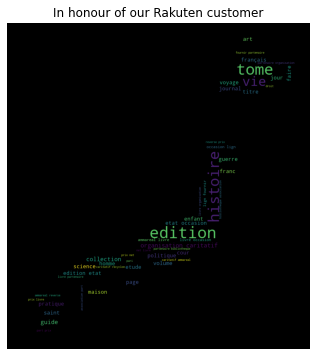

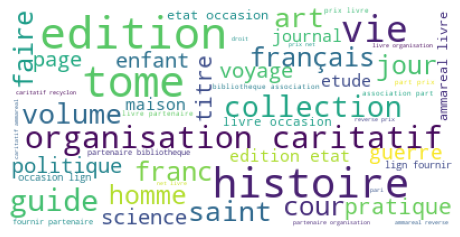


worldcloud for class 2280 :


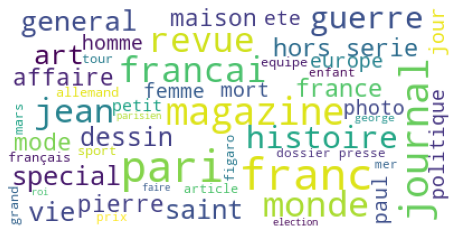


worldcloud for class 50 :


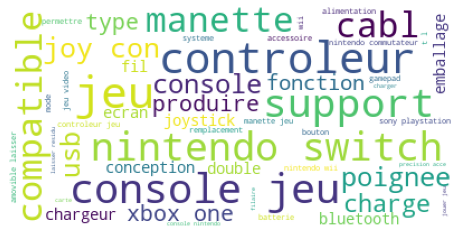


worldcloud for class 1280 :


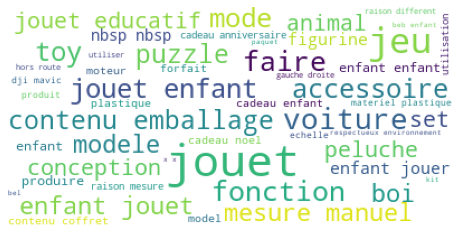


worldcloud for class 2705 :


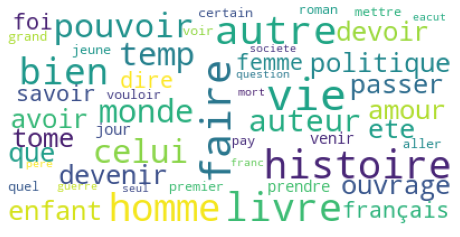


worldcloud for class 2522 :


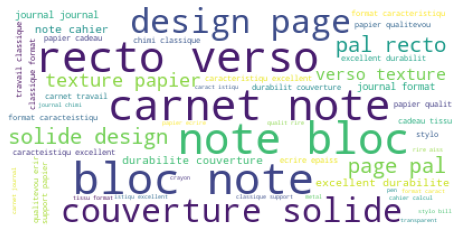


worldcloud for class 2582 :


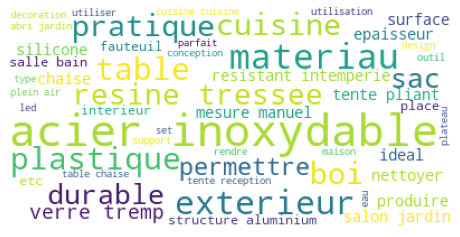


worldcloud for class 1560 :


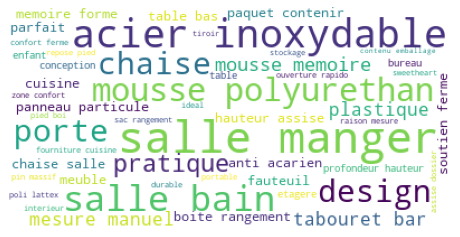


worldcloud for class 1281 :


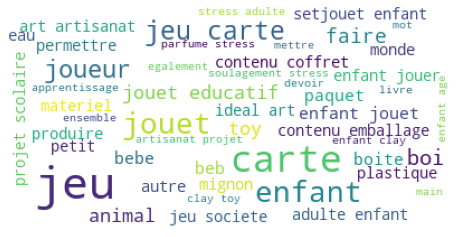


worldcloud for class 1920 :


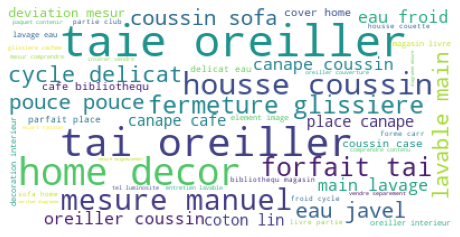


worldcloud for class 2403 :


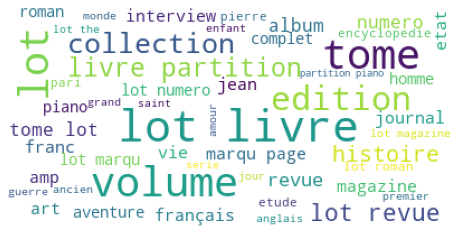


worldcloud for class 1140 :


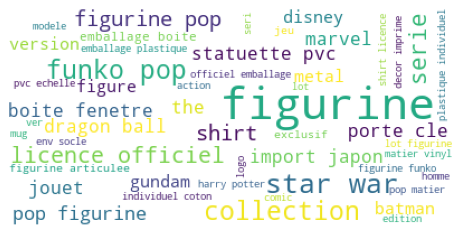


worldcloud for class 2583 :


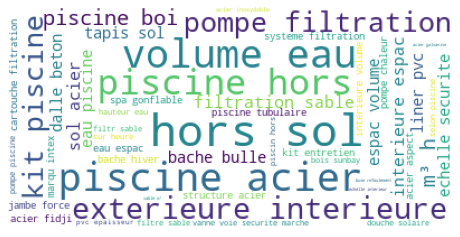


worldcloud for class 1180 :


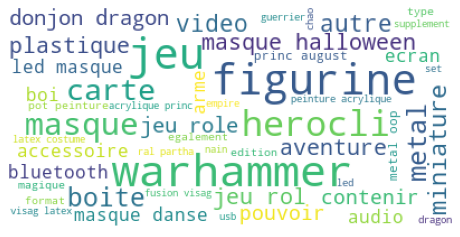


worldcloud for class 1300 :


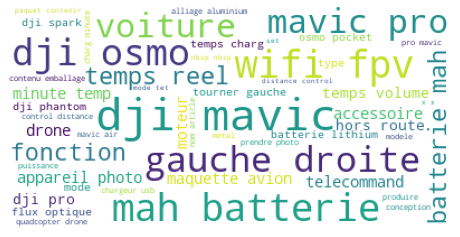


worldcloud for class 2462 :


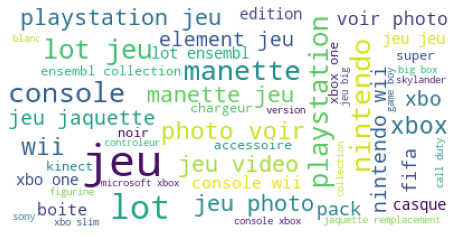


worldcloud for class 1160 :


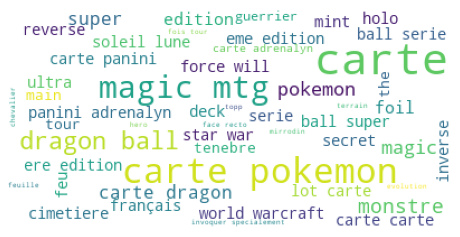


worldcloud for class 2060 :


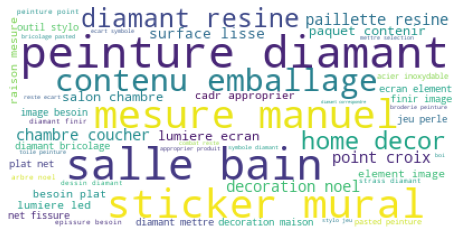


worldcloud for class 40 :


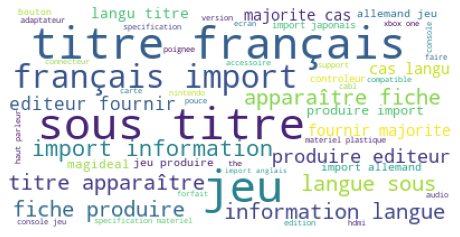


worldcloud for class 60 :


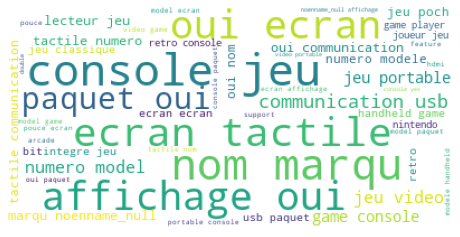


worldcloud for class 1320 :


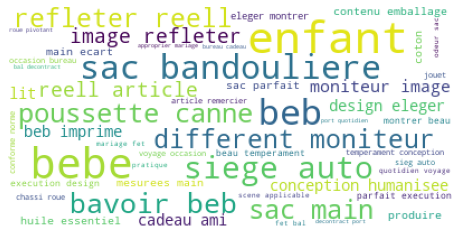


worldcloud for class 1302 :


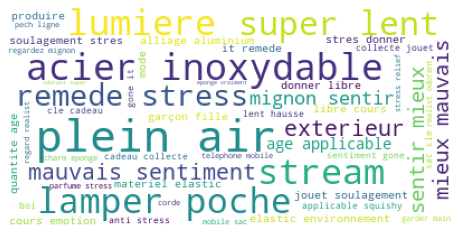


worldcloud for class 2220 :


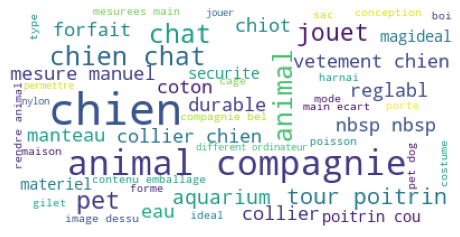


worldcloud for class 2905 :


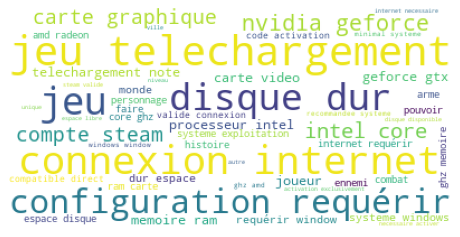


worldcloud for class 2585 :


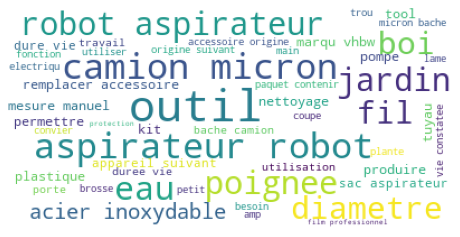


worldcloud for class 1940 :


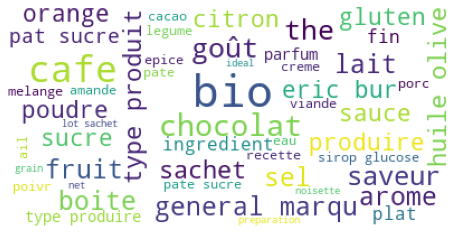


worldcloud for class 1301 :


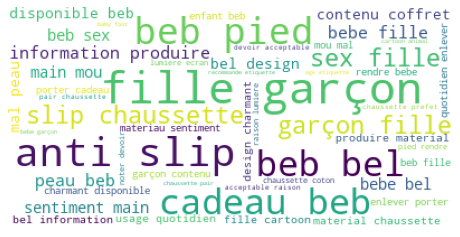


cell execution duration : 4.00 mn


In [11]:
from wordcloud import WordCloud
from PIL import Image
#for DataViz purpose
# Note : execution duration around 4 mn to display the 27 words cloud

start = time.time()

# In honour of our final customer Rakuten, japanese company
mask_Rakuten = np.array(Image.open("Japan_map.png"))
#In order to correct use of the mask transform 0 to 255
mask_Rakuten[mask_Rakuten == 0] = 255

# words cloud object configuration for generating and drawing
stop_words = []
wc = WordCloud(background_color="white", max_words=size_top, stopwords=stop_words, max_font_size=40, random_state=42)
wc_Rakuten = WordCloud(background_color="black", max_words=size_top, stopwords=stop_words, mask = mask_Rakuten, max_font_size=50, random_state=42)



# loop on product type code list
for k in target['prdtypecode'].unique():
    list_tokens_class = []
    # loop on products of this type code
    for i in range(len(data_train[data_train['prdtypecode'] == k])):
        list_tokens_one_product = data_train[data_train['prdtypecode'] == k]['designation_token_final'].iloc[i]
        #loop on designation field tokens of each product 
        for j in range(len(list_tokens_one_product)):
            list_tokens_class.append(list_tokens_one_product[j])
            
    # build a string with tokens of the current class
    text = ' '.join(list_tokens_class)
    print("\nworldcloud for class {0} :".format(k))
    
    #generate / compute wordcloud
    wc.generate(text)
    if (k == 10):
        wc_Rakuten.generate(text)

    #display
    if (k == 10):
        plt.figure(figsize= (10,6))
        plt.imshow(wc_Rakuten)
        plt.axis("off")
        plt.title('In honour of our Rakuten customer')
    plt.figure(figsize= (8,6))
    plt.imshow(wc)
    plt.axis("off")
    plt.show();

end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')


In [12]:
# display current columns after all EDA /preprocessing steps
data_train.head()

designation_orig  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4  La Guerre Des Tuques Luc a des idées de grande...   

                                   nom_img lang_designation  \
0  image_1263597046_product_3804725264.jpg               de   
1   image_1008141237_product_436067568.jpg               fr   
2    image_938777978_product_201115110.jpg               fr   
3     image_457047496_product_50418756.jpg               fr   
4   image_1077757786_product_278535884.jpg               fr   

                                         designation  prdtypecode  \
0  olivia: notebook personnalise /  pages / punks...           10   
1  journal des art (le) n°  du //   art et son ma...         2280   
2  grand stylet ergonomique bleu gamepad nintendo...           50   
3  peluche donald   europe   disneyland  (marionn...         1280   
4  la guerre des tuques luc a des idees de grande...         2705   

                             designation_token_final  
0                           [notebook, page, design]  
1  [journal, art, art, marche, salon, art, asiati...  
2  [stylet, ergonomique, gamepad, nintendo, wii, ...  
3  [peluche, donald, europe, disneyland, marionne...  
4  [guerre, luc, idees, grandeur, vouloir, organi...

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# column creation to be executed once
data_train['designation_str_tokens'] = ""
for i in range(len(data_train)):
    data_train['designation_str_tokens'].iloc[i] += " ".join(data_train['designation_token_final'].iloc[i]) 


tfidf_vectorizer = TfidfVectorizer(use_idf=True)
#Learn from vocabulary to compute the word counts, IDF values (as Inverse Document Frequency), 
# and Tf-idf scores (as Term frequency = count the number of a word )
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(data_train['designation_str_tokens'])
#Returns Xsparse matrix of (n_samples, n_features)
# Tf-idf-weighted document-term matrix.
print("each of the {0} products are now represented by an associated vector ".format(len(data_train)))
print("size of computed huge matrix :", tfidf_vectorizer_vectors.shape)
#matrix in optimized format mainly filled with 0
print("As mainly filled of 0 stored in memory in optimized format :")
print(type(tfidf_vectorizer_vectors))

print("number of features of each vector :",len(tfidf_vectorizer.get_feature_names()))
print("examples of features/unique words:",tfidf_vectorizer.get_feature_names()[2980:2986])

print("\nexample of product designation as a string of tokens :")
print(data_train['designation_str_tokens'].iloc[1])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer = tfidf_vectorizer_vectors[1] 

# print idf values in a df_vectors
df_tfidf = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
# sort
print("\nhere is its term frequency idf :")
print("Remember : The lower the idf value of a word, the less unique it is")
print("in other words : lowest IDF values for terms appearing often due to the I as Inverse ")
df_tfidf = df_tfidf.sort_values(by=["tfidf"],ascending=False)
display(df_tfidf.head(16))


C:\Users\christophe\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


each of the 84613 products are now represented by an associated vector 
size of computed huge matrix : (84613, 51358)
As mainly filled of 0 stored in memory in optimized format :
<class 'scipy.sparse.csr.csr_matrix'>
number of features of each vector : 51358
examples of features/unique words: ['asse', 'assech', 'assecher', 'assembl', 'assemblage', 'assemblagetool']

example of product designation as a string of tokens :
journal art art marche salon art asiatique pari jacques barrere francois reforme vente enchere public fete cent

here is its term frequency idf :
Remember : The lower the idf value of a word, the less unique it is
in other words : lowest IDF values for terms appearing often due to the I as Inverse 


tfidf
art        0.467560
barrere    0.351472
francois   0.307014
enchere    0.294010
asiatique  0.270472
reforme    0.268603
cent       0.260611
jacques    0.242935
public     0.206026
pari       0.183455
journal    0.171489
fete       0.163862
vente      0.160427
marche     0.158320
salon      0.147493
paysan     0.000000

In [61]:
# !!!!! TfidfVectorizer has been preferred ,kept as training example
#from sklearn.feature_extraction.text import CountVectorizer

#list storing all tokens of column designation_token_final
#global_token_designation = []
#for i in range(len(data_train)):
#    global_token_designation.extend(data_train['designation_token_final'].iloc[i])


# object creation
#vectorizer = CountVectorizer()

#Convert a collection of text documents to a matrix of token counts
#the number of features will be equal to the vocabulary size found by analyzing the data
# Apply Bag of Words to the designation_token_final variable of all dataset samples.
#vectorizer.fit_transform(global_token_designation)

# get dictionary of tokens
#dico_BOW = vectorizer.vocabulary_

#use of working list rather dict items 
#list_kv_bag_of_words=[]
#[list_kv_bag_of_words.append([k,v]) for k,v in dico_BOW.items()]

#print("size of bag of words dictionary :",len(list_kv_bag_of_words))

#for i in range(10,20):
#    print("word and its associated number in bag of word :" , list_kv_bag_of_words[i])


#eg_designation = data_train['designation'].iloc[2]
#print("\nexample of text to be transformed in vector of integers using vocabulary attribute of bag of words dictionary :")
#print("")
#print(eg_designation)
#eg_designation_tokenized = data_train['designation_token_final'].iloc[2]
#print("")
#print(eg_designation_tokenized)
#print("")
#designation_str_tokens = ""
#designation_str_tokens += " ".join(data_train['designation_token_final'].iloc[2]) 
#print(designation_str_tokens)


# if a word is present several times in the text, its count will be equal to the number of occurences.
#parameter : binarybool, default=False
#If True, all non zero counts are set to 1. 
#This is useful for discrete probabilistic models that model binary events rather than integer counts.

# list with one list (vector)
#designation_vectorized = vectorizer.transform([designation_str_tokens]).toarray()
#print("\nsum of counters in vector representing tokens list of this designation  :",designation_vectorized.sum())
#print("text encoded as a vector of {0} counters \n".format(designation_vectorized.shape[1]),designation_vectorized)
#print("list of counters not null :")
#counters_not_null = []
#for counter in range(designation_vectorized.shape[1]):
#    if(designation_vectorized[0][counter] != 0):
#        counters_not_null.append(designation_vectorized[0][counter])
#print(counters_not_null)

size of bag of words dictionary : 54635
word and its associated number in bag of word : ['francois', 20544]
word and its associated number in bag of word : ['reforme', 41368]
word and its associated number in bag of word : ['vente', 51871]
word and its associated number in bag of word : ['enchere', 17007]
word and its associated number in bag of word : ['public', 39787]
word and its associated number in bag of word : ['fete', 19330]
word and its associated number in bag of word : ['cent', 8168]
word and its associated number in bag of word : ['stylet', 47363]
word and its associated number in bag of word : ['ergonomique', 17723]
word and its associated number in bag of word : ['gamepad', 21090]

example of text to be transformed in vector of integers using vocabulary attribute of bag of words dictionary :

grand stylet ergonomique bleu gamepad nintendo wii u   speedlink pilot style pilot style touch pen de marque speedlink est  stylet ergonomique pour gamepad nintendo wii u. pour un co

In [15]:
# search of bigrams and trigrams most occurences per class 
from nltk import bigrams
from nltk.util import trigrams

# Note : execution duration around 5 mn

start = time.time()

all_bigram = []
all_freq_bigram = []
all_trigram = []
all_freq_trigram = []

# loop on product type code list
for k in target['prdtypecode'].unique():
    all_tokens = ""
    # loop on products of this type code
    # list converted in string
    for i in range(len(data_train[data_train['prdtypecode'] == k])):
        all_tokens += " ".join(data_train[data_train['prdtypecode'] == k]['designation_token_final'].iloc[i]) 
        all_tokens += " "

    bigram_class = bigrams(all_tokens.split(' '))
    dico_bigram = Counter(bigram_class)
    all_bigram.append([m[0] for m in dico_bigram.most_common(size_top)]) 
    all_freq_bigram.append([m[1] for m in dico_bigram.most_common(size_top)])
    trigram_class=trigrams(all_tokens.split(' '))
    dico_trigram = Counter(trigram_class)
    all_trigram.append([m[0] for m in dico_trigram.most_common(size_top)]) 
    all_freq_trigram.append([m[1] for m in dico_trigram.most_common(size_top)])

# the print present for debug purpose
# study on top most encountered bigram and trigram in progress 

for i in range(len(all_classes)): 
    print("\nfor class {0} :".format(all_classes[i]),"\n")
    for j in range(size_top):
        print(all_bigram[i][j],all_freq_bigram[i][j])
    print("\nsequences of three successive tokens :\n")
    for j in range(size_top):
        print(all_trigram[i][j],all_freq_trigram[i][j])
        
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')




for class 10 : 

('organisation', 'caritatif') 80
('edition', 'etat') 41
('etat', 'occasion') 41
('ammareal', 'livre') 41
('livre', 'occasion') 41
('occasion', 'lign') 41
('lign', 'fournir') 41
('fournir', 'partenaire') 41
('partenaire', 'bibliotheque') 41
('bibliotheque', 'association') 41
('association', 'part') 41
('part', 'prix') 41
('prix', 'livre') 41
('livre', 'partenaire') 41
('partenaire', 'organisation') 41
('caritatif', 'recyclon') 41
('ammareal', 'reverse') 39
('reverse', 'prix') 39
('prix', 'net') 39
('net', 'livre') 39
('livre', 'organisation') 39
('caritatif', 'ammareal') 39
('occasion', 'isbn') 23
('ancien', 'livre') 23
('livre', 'bibliothequ') 21
('isbn', 'commentaire') 20
('editeur', 'edition') 19
('auteur', 'editeur') 17
('commentaire', 'ancien') 16
('occasion', 'commentair') 16
('bibliothequ', 'edition') 11
('traduire', 'anglais') 9
('couvertur', 'ammareal') 9
('tome', 'edition') 9
('guide', 'pratique') 9
('salissure', 'tranche') 8
('couverture', 'ammareal') 8
('co

('individuel', 'coton.informations', 'type') 24
('vinyl', 'boite', 'fenetre') 24
('pop', 'figurine', 'funko') 23
('taille', 'disponible', 'article') 22
('disponible', 'article', 'choisir') 22
('article', 'choisir', 'souhaitee') 22
('choisir', 'souhaitee', 'ajouter') 22
('souhaitee', 'ajouter', 'article') 22
('ajouter', 'article', 'panier') 22
('livraison', 'semaine', 'numero') 22
('semaine', 'numero', 'suivre') 22
('numero', 'suivre', 'tax') 22
('suivre', 'tax', 'importation') 22
('tax', 'importation', 'charge') 22
('importation', 'charge', 'pays') 22
('charge', 'pays', 'europeen') 22
('vendre', 'window', 'box') 22
('echelle', 'env', 'socle') 21
('figurine', 'articulee', 'env') 21
('plusieurs', 'taille', 'disponible') 21
('coton.informations', 'type', 'shirtsediteur') 20
('socle', 'emballage', 'boite') 20
('coton', 'plusieurs', 'taille') 20
('env', 'socle', 'emballage') 19
('plastique', 'individuel', 'coton') 19
('individuel', 'coton', 'plusieurs') 19
('hot', 'toys', 'mms') 19
('star',

('soulagement', 'stres', 'donner') 164
('donner', 'libre', 'cours') 163
('libre', 'cours', 'emotion') 162
('quantite', 'age', 'applicable') 160
('stres', 'donner', 'libre') 158
('mauvais', 'sentiment', 'gone.it') 155
('sentiment', 'gone.it', 'remede') 155
('gone.it', 'remede', 'stress') 155
('sac', 'cle', 'cadeau') 155
('cle', 'cadeau', 'collecte') 154
('cadeau', 'collecte', 'jouet') 154
('collecte', 'jouet', 'soulagement') 154
('regardez', 'mignon', 'sentir') 145
('telephone', 'mobile', 'sac') 140
('mobile', 'sac', 'cle') 140
('age', 'applicable', 'squishy') 138
('regard', 'realist', 'odorant') 137
('realist', 'odorant', 'super') 136
('charm', 'eponge', 'vraiment') 135
('eponge', 'vraiment', 'tactile') 135
('vraiment', 'tactile', 'regard') 135
('tactile', 'regard', 'realist') 135
('mesure', 'garder', 'main') 131
('stupide', 'super', 'lent') 126
('activite', 'plein', 'air') 122
('appat', 'minnow', 'leurre') 110
('plastique', 'hardbass', 'appat') 108
('hardbass', 'appat', 'minnow') 108


In [40]:
#text mining in this notebook, computer vision will be in second step

# one-shot display to be commented later, to estimate visually the diversity within each group
# for every type code , display 10 images of related products stored under this class
# to understand if the classification is logic for an human point of view (not always obvious for me at least)
# before thinking to requesting a model to do this task :-)
# If helpful for us decide for a generic name for the 27 classes.....
# class 2583 : swimming pool equipments :-)

#for i in target['prdtypecode'].unique() : 
#    print("10 images of products of class :",i,"\n")
#    ten_products = target[target['prdtypecode'] == i].head(10)
#    image_list = []
#   designation_list = []
#    for j in ten_products.index :
#        image_list.append(data_train.iloc[j,4])
#        designation_list.append(data_train.iloc[j,0])

#    for k,l in zip(image_list,designation_list) :
#        print(l,":\n")
#        image = img.imread('./images/image_train/'+ k)
#        plt.imshow(image)
#        plt.axis('off');
#        plt.show()
                
 
